# Importation des données

In [1]:
import pandas as pd
from sqlalchemy import create_engine

engine = create_engine('sqlite:///data.db', echo=False)
con = engine.connect()
df_patient = pd.read_sql('select * from patient', con=con)
df_pcr = pd.read_sql('select * from test', con=con)
con.close()

In [2]:
# Afficher les données des 5 premiers patients

df_patient.head()


,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2
0,221958,matisse,clarke,13.0,rene street,ellenbrook,2527,wa,19710708.0,32.0,08 86018809,westella
1,771155,joshua,elrick,23.0,andrea place,east preston,2074,nsw,19120921.0,34.0,02 97793152,foxdown
2,231932,alice,conboy,35.0,mountain circuit,prospect,2305,nsw,19810905.0,22.0,02 20403934,None
3,465838,sienna,craswell,39.0,cumberlegeicrescent,henty,3620,wa,19840809.0,30.0,02 62832318,jodane
4,359178,joshua,bastiaans,144.0,lowrie street,campbell town,4051,nsw,19340430.0,31.0,03 69359594,None


In [3]:
# Afficher le nombre total de patients

print("le nombre de patients est :", len(df_patient['patient_id'].unique()))

le nombre de patients est : 19798


In [4]:
# Afficher les données des 5 premiers résultats PCR 

df_pcr.head()

,patient_id,pcr
0,653091,N
1,347667,Negative
2,708481,Positive
3,148825,Negative
4,150081,Negative


In [5]:
# Afficher le nombre total de PCR

print("le total de PCR est :", len(df_pcr['patient_id'].unique()))

le total de PCR est : 8765


In [6]:

import numpy as np
import matplotlib.pyplot as plt

# Suppression des doublons

In [7]:
def detect_duplicates(df):

    
    df.drop_duplicates(["patient_id"],keep="first", inplace=True)
   
    df['given_name'].replace('', np.nan, inplace=True)
    df['surname'].replace('', np.nan, inplace=True)
    df['street_number'].replace('', np.nan, inplace=True)
    df['address_1'].replace('', np.nan, inplace=True)
    df['suburb'].replace('', np.nan, inplace=True)
    df['postcode'].replace('', np.nan, inplace=True)
    df['state'].replace('', np.nan, inplace=True)
    df['date_of_birth'].replace('', np.nan, inplace=True)
    df['age'].replace('', np.nan, inplace=True)
    df['phone_number'].replace('', np.nan, inplace=True)
    df['address_2'].replace('', np.nan, inplace=True)
    
    df.dropna(subset=['given_name'], inplace=True)
    df.dropna(subset=['surname'], inplace=True)
    df.dropna(subset=['street_number'], inplace=True)
    df.dropna(subset=['address_1'], inplace=True)
    df.dropna(subset=['suburb'], inplace=True)
    df.dropna(subset=['postcode'], inplace=True)
    df.dropna(subset=['state'], inplace=True)
    df.dropna(subset=['date_of_birth'], inplace=True)
    df.dropna(subset=['age'], inplace=True)
    df.dropna(subset=['phone_number'], inplace=True)
    df.dropna(subset=['address_2'], inplace=True)
    return df



In [8]:
detect_duplicates(df_patient)

df_patient['state'].replace('ndw', 'nsw', inplace=True)
df_patient['state'].replace('nsa', 'nsw', inplace=True)
df_patient['state'].replace('nfw', 'nsw', inplace=True)
df_patient['state'].replace('nfsw', 'nsw', inplace=True)
df_patient['state'].replace('nsd', 'nsw', inplace=True)
df_patient['state'].replace('nsc', 'nsw', inplace=True)
df_patient['state'].replace('nsew', 'nsw', inplace=True)
df_patient['state'].replace('nsxw', 'nsw', inplace=True)
df_patient['state'].replace('nsn', 'nsw', inplace=True)
df_patient['state'].replace('nssw', 'nsw', inplace=True)
df_patient['state'].replace('nsgs', 'nsw', inplace=True)
df_patient['state'].replace('nss', 'nsw', inplace=True)
df_patient['state'].replace('nsjh', 'nsw', inplace=True)
df_patient['state'].replace('ns', 'nsw', inplace=True)
df_patient['state'].replace('qls', 'qld', inplace=True)
df_patient['state'].replace('qlr', 'qld', inplace=True)
df_patient['state'].replace('qod', 'qld', inplace=True)
df_patient['state'].replace('qle', 'qld', inplace=True)
df_patient['state'].replace('ta', 'sa', inplace=True)
df_patient['state'].replace('vie', 'vic', inplace=True)
df_patient['state'].replace('vif', 'vic', inplace=True)
df_patient['state'].replace('vq', 'vic', inplace=True)
df_patient['state'].replace('vcci', 'vic', inplace=True)

# Jointure entre les dataframes 

In [9]:
df = pd.merge(df_patient, df_pcr, how="inner", left_on="patient_id", right_on="patient_id")
df

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2,pcr
0,771155,joshua,elrick,23.0,andrea place,east preston,2074,nsw,19120921.0,34.0,02 97793152,foxdown,Negative
1,832180,jack,renfrey,27.0,osmand street,maribyrnong,2170,qld,19610518.0,31.0,03 15575583,dhurringill,P
2,517113,trey,glass,27.0,mugga way,carnegie,5093,nsw,19180715.0,21.0,08 08091408,blackridge flyfishing school,Negative
3,996942,zachary,piazza,772.0,beaney street,manunda,2223,sa,19750703.0,25.0,02 36108470,rsd frareen,N
4,323165,taylor,binns,2.0,dunbar street,mount annan,4455,wa,19000509.0,11.0,08 99185004,sec 528,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852,444199,matthew,roebuck,44.0,fuhrman street,tea tree gully,6112,wa,19421123.0,36.0,03 12751519,greenbank,N
1853,124956,marleigh,seen,11.0,crisp circuit,lavington,2640,sa,19640108.0,27.0,04 65522089,stoneyhurst,N
1854,513727,kane,costigan,1.0,stonehaven crescent,shenton park,2203,nsw,19100707.0,22.0,04 55808760,townview,Negative
1855,230775,victoria,whiteley,12.0,beasley street,landsborough,2388,nsw,19491217.0,30.0,03 68108604,ponderosa,P


# Représentation graphique des résultats

In [10]:
#Remplacer les résultats P par Positive

df['pcr'].replace(to_replace='P',value='Positive',inplace=True)

#Remplacer les résultats N par Negative

df['pcr'].replace(to_replace='N',value='Negative',inplace=True)

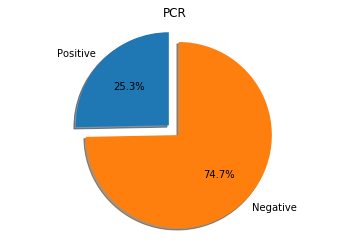

In [11]:
#Représentation graphique des pourcentages des PCR positifs et négarifs

a = (df['pcr'] == 'Positive').sum()
b = (df['pcr'] == 'Negative').sum()
name = ['Positive', 'Negative']
data = [a,b]

explode=(0, 0.15)
plt.pie(data, explode=explode, labels=name, autopct='%1.1f%%', startangle=90, shadow=True)
plt.axis('equal')
plt.title('PCR')
plt.show()